Student Name - Gauri Damle
ID - NU002931881

# **Assignment 5**



1. Who is getting more salary on the experience, company size, and job type level ("employment_type", "experience_level", "company_size") 
2. Show the top 10 companies that have more jobs. 
3. Show the remote job ratio by job title. 
4. Remote job growth ratio by year (how remote jobs are rising).
5. Data Scientist jobs average salary in USD by geographic distribution (create the maps). 
6. Which geography has more data science jobs than other roles? 

In [ ]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datawrapper
from datawrapper import Datawrapper
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading & Processing Data

In [ ]:
#country_mapping = pd.read_csv("/kaggle/input/country-mapping-iso-continent-region/continents2.csv")
data = pd.read_csv("/content/drive/MyDrive/SemesterTwo/6600/6600ComputationAndVisualization/Assignment5/ds_salaries.csv")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# We'll update some columns' values based on the data description
data["employment_type"] = data["employment_type"].replace({"FT": "Full Time", "PT": "Part Time", "CT": "Contract", "FL": "Freelance"})
data["company_size"] = data["company_size"].replace({"S": "Small", "M": "Medium", "L":"Large"})
data["experience_level"] = data["experience_level"].replace({"EN": "Entry Level/Junior", "MI": "Mid Level/Intermediate", "SE": "Senior Level/Expert", "EX": "Executive Level/Director"})

In [ ]:
data["Same_Location"] = (data["employee_residence"] == data["company_location"]).to_numpy()

In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'Same_Location'],
      dtype='object')

# 1. Who is getting more salary on the experience, company size, and job type level ("employment_type", "experience_level", "company_size") 

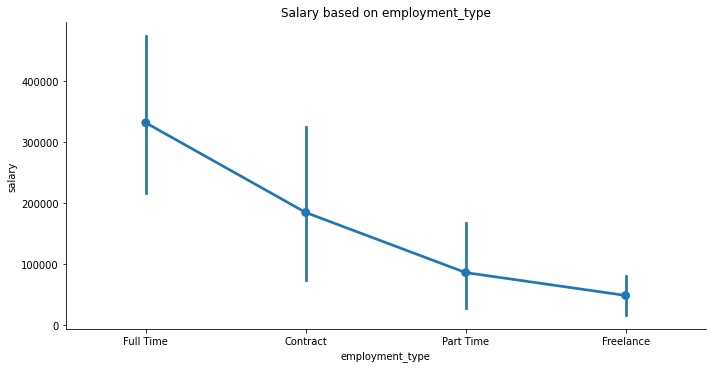

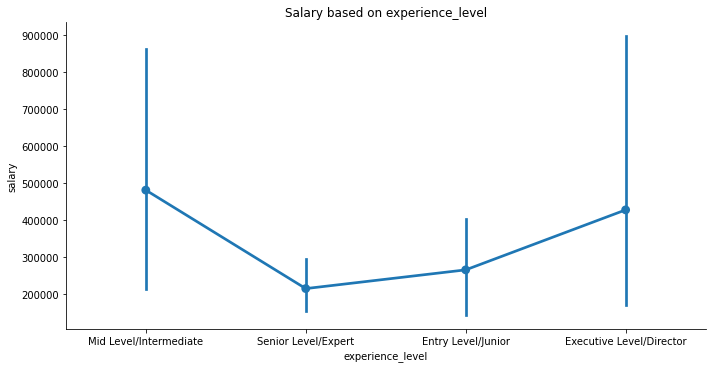

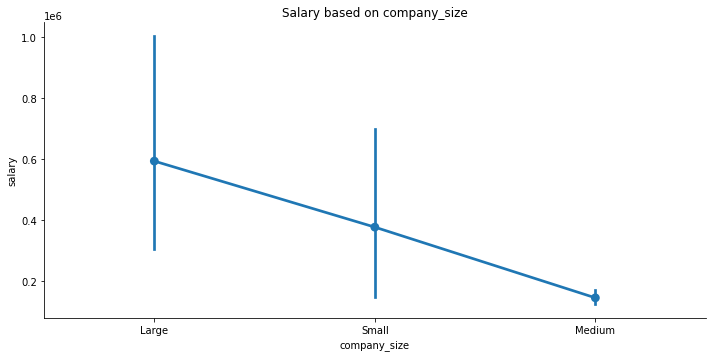

In [ ]:
list_values = ["employment_type", "experience_level", "company_size"]
for no,i in enumerate(list_values):
  
  sns.catplot(x=i, y='salary', data = data, kind='point', aspect=2)
  plt.title('Salary based on {}'.format(i))

Conclusion :

- Based on Employment type, the largest salary is for jobs are Full Time followed by contract, part-time and lastly freelance.<br>
- Based on experience level Mid level/intermediate and executive have large salary on an average than entry level and senior level.
- Based on company size the large companies are with largest avg salary followed by small size and then medium.

In [ ]:
df1_employment_type  = data[["employment_type","salary"]]
df1_experience_level  = data[["experience_level","salary"]]
df1_company_size  = data[["company_size","salary"]]

In [ ]:
df1_employment_type = round(df1_employment_type.groupby('employment_type').mean(),2).reset_index()
df1_experience_level = round(df1_experience_level.groupby('experience_level').mean(),2).reset_index()
df1_company_size = round(df1_company_size.groupby('company_size').mean(),2).reset_index()

# 2. Show the top 10 companies that have more jobs.

In [ ]:
df2 = data.groupby('company_location').count().reset_index()

In [ ]:
df2 = df2[["company_location","job_title"]]

In [ ]:
df2 = df2.sort_values(by="job_title", ascending=False).head(10)

conclusion : top 10 locations are shown above us tops the list with huge margin.

# 3. Show the remote job ratio by job title. 

In [ ]:
df3 = data [["remote_ratio","job_title"]]

In [ ]:
df3 = round(df3.groupby('job_title').mean(),2).reset_index()

In [ ]:
df3

conclusion :  For every title of the top 10 most present titles, the majority of jobs are 100% Remote.

# 4. Remote job growth ratio by year (how remote jobs are rising).

In [ ]:
df4 = data [["remote_ratio","work_year"]]

In [ ]:
df4 = df4.groupby('work_year').mean().reset_index()

In [ ]:
df4

,work_year,remote_ratio
0,2020,64.583333
1,2021,69.124424
2,2022,73.584906


conclusion : graph shows steady growth in remote jobs from 2020 t0 2022

From 2020 to 2022, the evolution of Fully Remote Jobs was impressive: in terms of both the number of jobs and the average salary!

# 5. Data Scientist jobs average salary in USD by geographic distribution (create the maps).

In [ ]:
df5 = data[data["job_title"]=="Data Scientist"]

In [ ]:
df5 = df5 [["company_location","salary_in_usd"]]

In [ ]:
df5 = round(df5.groupby('company_location').mean(),2).reset_index()

In [ ]:
df5

,company_location,salary_in_usd
0,AT,76352.00
1,AU,86703.00
2,BR,12901.00
3,CA,77787.00
4,CH,122346.00
5,CL,40038.00
6,DE,69640.14
7,DZ,100000.00
8,ES,41136.67
9,FR,50085.57


conclusion : Data scientist is the most exciting job.

# 6. Which geography has more data science jobs than other roles?

In [ ]:
df6 = data [["company_location","job_title"]]

In [ ]:
df6['Data_science_flag']= df6.apply(lambda x : 1 if x.job_title == "Data Scientist" else 0, axis=1)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df6 

,company_location,job_title,Data_science_flag
0,DE,Data Scientist,1
1,JP,Machine Learning Scientist,0
2,GB,Big Data Engineer,0
3,HN,Product Data Analyst,0
4,US,Machine Learning Engineer,0
...,...,...,...
602,US,Data Engineer,0
603,US,Data Engineer,0
604,US,Data Analyst,0
605,US,Data Analyst,0


In [ ]:
# pivot table
df6_pivot = df6.pivot_table(columns = ['Data_science_flag'], index = 'company_location', values = 'Data_science_flag', aggfunc='count').reset_index()

In [ ]:
df6_pivot = df6_pivot.fillna('0')

In [ ]:
df6_pivot[0] = df6_pivot[0].astype(int) 
df6_pivot[1] = df6_pivot[1].astype(int) 

In [ ]:
df6_location = df6_pivot[df6_pivot[0] < df6_pivot[1]]

In [ ]:
df6_final = df6_location[['company_location']]

In [ ]:
df6_final

Data_science_flag,company_location
8,CL
14,DZ
22,HU
24,IL
35,MY
47,UA
49,VN


conclusion : 7 locations have more datascience jobs than 24 total location. 

# **Datawrapper connection**

**Question 1**

In [ ]:
dw = Datawrapper("6ZH6zytoEv0CSgzNb2vhd4o6MDyJNRuZoFTomnWMLw97kI8LJpv6XpNhf0OkuQY0")
dw.account_info()

{'chartCount': 15,
 'email': 'damle.g@northeastern.edu',
 'id': 476074,
 'language': 'en-US',
 'name': None,
 'role': 'editor',
 'teams': [],
 'url': '/v3/users/476074'}

In [ ]:
df1_employment_type = dw.create_chart(title = "Salary based on Employment type", chart_type = 'd3-bars-stacked', data = df1_employment_type)

New chart d3-bars-stacked created!


In [ ]:
dw.publish_chart(chart_id = df1_employment_type['id'])

In [ ]:
df1_experience_level = dw.create_chart(title = "Salary based on experience level", chart_type = 'd3-bars-stacked', data = df1_experience_level)

In [ ]:
dw.publish_chart(chart_id = df1_experience_level['id'])

In [ ]:
df1_company_size = dw.create_chart(title = "Salary based on company size", chart_type = 'd3-bars-stacked', data = df1_company_size)

New chart d3-bars-stacked created!


In [ ]:
dw.publish_chart(chart_id = df1_company_size['id'])

**Question 2**





In [ ]:
df2

,company_location,job_title
48,US,355
18,GB,47
6,CA,30
12,DE,28
25,IN,24
17,FR,15
16,ES,14
19,GR,11
29,JP,6
40,PL,4


In [ ]:
df2 = dw.create_chart(title = "Top 10 locations as per Job opportunities", chart_type = 'd3-bars-stacked', data = df2)

New chart d3-bars-stacked created!


In [ ]:
dw.publish_chart(chart_id = df2['id'])

**Question 3**

In [ ]:
df3 = dw.create_chart(title = "Remote job ratio by job title", chart_type = 'd3-bars-stacked', data = df3)

New chart d3-bars-stacked created!


In [ ]:
dw.publish_chart(chart_id = df3['id'])

**Question 4**

In [ ]:
df4 = dw.create_chart(title = "Remote job growth ratio by year", chart_type = 'd3-bars-stacked', data = df4)

New chart d3-bars-stacked created!


In [ ]:
dw.publish_chart(chart_id = df4['id'])

**Question 5**

In [151]:
## maping short forms of countries with full forms

short2long = {"AF":"Afghanistan",
"AX":"Aland Islands",
"AL":"Albania",
"DZ":"Algeria",
"AS":"American Samoa",
"AD":"Andorra",
"AO":"Angola",
"AI":"Anguilla",
"AQ":"Antarctica",
"AG":"Antigua and Barbuda",
"AR":"Argentina",
"AM":"Armenia",
"AW":"Aruba",
"AU":"Australia",
"AT":"Austria",
"AZ":"Azerbaijan",
"BS":"Bahamas",
"BH":"Bahrain",
"BD":"Bangladesh",
"BB":"Barbados",
"BY":"Belarus",
"BE":"Belgium",
"BZ":"Belize",
"BJ":"Benin",
"BM":"Bermuda",
"BT":"Bhutan",
"BO":"Bolivia, Plurinational State of",
"BQ":"Bonaire, Sint Eustatius and Saba",
"BA":"Bosnia and Herzegovina",
"BW":"Botswana",
"BV":"Bouvet Island",
"BR":"Brazil",
"IO":"British Indian Ocean Territory",
"BN":"Brunei Darussalam",
"BG":"Bulgaria",
"BF":"Burkina Faso",
"BI":"Burundi",
"KH":"Cambodia",
"CM":"Cameroon",
"CA":"Canada",
"CV":"Cape Verde",
"KY":"Cayman Islands",
"CF":"Central African Republic",
"TD":"Chad",
"CL":"Chile",
"CN":"China",
"CX":"Christmas Island",
"CC":"Cocos (Keeling) Islands",
"CO":"Colombia",
"KM":"Comoros",
"CG":"Congo",
"CD":"Congo, The Democratic Republic of the",
"CK":"Cook Islands",
"CR":"Costa Rica",
"CI":"Côte d'Ivoire",
"HR":"Croatia",
"CU":"Cuba",
"CW":"Curaçao",
"CY":"Cyprus",
"CZ":"Czech Republic",
"DK":"Denmark",
"DJ":"Djibouti",
"DM":"Dominica",
"DO":"Dominican Republic",
"EC":"Ecuador",
"EG":"Egypt",
"SV":"El Salvador",
"GQ":"Equatorial Guinea",
"ER":"Eritrea",
"EE":"Estonia",
"ET":"Ethiopia",
"FK":"Falkland Islands (Malvinas)",
"FO":"Faroe Islands",
"FJ":"Fiji",
"FI":"Finland",
"FR":"France",
"GF":"French Guiana",
"PF":"French Polynesia",
"TF":"French Southern Territories",
"GA":"Gabon",
"GM":"Gambia",
"GE":"Georgia",
"DE":"Germany",
"GH":"Ghana",
"GI":"Gibraltar",
"GR":"Greece",
"GL":"Greenland",
"GD":"Grenada",
"GP":"Guadeloupe",
"GU":"Guam",
"GT":"Guatemala",
"GG":"Guernsey",
"GN":"Guinea",
"GW":"Guinea-Bissau",
"GY":"Guyana",
"HT":"Haiti",
"HM":"Heard Island and McDonald Islands",
"VA":"Holy See (Vatican City State)",
"HN":"Honduras",
"HK":"Hong Kong",
"HU":"Hungary",
"IS":"Iceland",
"IN":"India",
"ID":"Indonesia",
"IR":"Iran, Islamic Republic of",
"IQ":"Iraq",
"IE":"Ireland",
"IM":"Isle of Man",
"IL":"Israel",
"IT":"Italy",
"JM":"Jamaica",
"JP":"Japan",
"JE":"Jersey",
"JO":"Jordan",
"KZ":"Kazakhstan",
"KE":"Kenya",
"KI":"Kiribati",
"KP":"Korea, Democratic People's Republic of",
"KR":"Korea, Republic of",
"KW":"Kuwait",
"KG":"Kyrgyzstan",
"LA":"Lao People's Democratic Republic",
"LV":"Latvia",
"LB":"Lebanon",
"LS":"Lesotho",
"LR":"Liberia",
"LY":"Libya",
"LI":"Liechtenstein",
"LT":"Lithuania",
"LU":"Luxembourg",
"MO":"Macao",
"MK":"Macedonia, Republic of",
"MG":"Madagascar",
"MW":"Malawi",
"MY":"Malaysia",
"MV":"Maldives",
"ML":"Mali",
"MT":"Malta",
"MH":"Marshall Islands",
"MQ":"Martinique",
"MR":"Mauritania",
"MU":"Mauritius",
"YT":"Mayotte",
"MX":"Mexico",
"FM":"Micronesia, Federated States of",
"MD":"Moldova, Republic of",
"MC":"Monaco",
"MN":"Mongolia",
"ME":"Montenegro",
"MS":"Montserrat",
"MA":"Morocco",
"MZ":"Mozambique",
"MM":"Myanmar",
"NA":"Namibia",
"NR":"Nauru",
"NP":"Nepal",
"NL":"Netherlands",
"NC":"New Caledonia",
"NZ":"New Zealand",
"NI":"Nicaragua",
"NE":"Niger",
"NG":"Nigeria",
"NU":"Niue",
"NF":"Norfolk Island",
"MP":"Northern Mariana Islands",
"NO":"Norway",
"OM":"Oman",
"PK":"Pakistan",
"PW":"Palau",
"PS":"Palestinian Territory, Occupied",
"PA":"Panama",
"PG":"Papua New Guinea",
"PY":"Paraguay",
"PE":"Peru",
"PH":"Philippines",
"PN":"Pitcairn",
"PL":"Poland",
"PT":"Portugal",
"PR":"Puerto Rico",
"QA":"Qatar",
"RE":"Réunion",
"RO":"Romania",
"RU":"Russian Federation",
"RW":"Rwanda",
"BL":"Saint Barthélemy",
"SH":"Saint Helena, Ascension and Tristan da Cunha",
"KN":"Saint Kitts and Nevis",
"LC":"Saint Lucia",
"MF":"Saint Martin (French part)",
"PM":"Saint Pierre and Miquelon",
"VC":"Saint Vincent and the Grenadines",
"WS":"Samoa",
"SM":"San Marino",
"ST":"Sao Tome and Principe",
"SA":"Saudi Arabia",
"SN":"Senegal",
"RS":"Serbia",
"SC":"Seychelles",
"SL":"Sierra Leone",
"SG":"Singapore",
"SX":"Sint Maarten (Dutch part)",
"SK":"Slovakia",
"SI":"Slovenia",
"SB":"Solomon Islands",
"SO":"Somalia",
"ZA":"South Africa",
"GS":"South Georgia and the South Sandwich Islands",
"ES":"Spain",
"LK":"Sri Lanka",
"SD":"Sudan",
"SR":"Suriname",
"SS":"South Sudan",
"SJ":"Svalbard and Jan Mayen",
"SZ":"Swaziland",
"SE":"Sweden",
"CH":"Switzerland",
"SY":"Syrian Arab Republic",
"TW":"Taiwan, Province of China",
"TJ":"Tajikistan",
"TZ":"Tanzania, United Republic of",
"TH":"Thailand",
"TL":"Timor-Leste",
"TG":"Togo",
"TK":"Tokelau",
"TO":"Tonga",
"TT":"Trinidad and Tobago",
"TN":"Tunisia",
"TR":"Turkey",
"TM":"Turkmenistan",
"TC":"Turks and Caicos Islands",
"TV":"Tuvalu",
"UG":"Uganda",
"UA":"Ukraine",
"AE":"United Arab Emirates",
"GB":"United Kingdom",
"US":"United States",
"UM":"United States Minor Outlying Islands",
"UY":"Uruguay",
"UZ":"Uzbekistan",
"VU":"Vanuatu",
"VE":"Venezuela, Bolivarian Republic of",
"VN":"Viet Nam",
"VG":"Virgin Islands, British",
"VI":"Virgin Islands, U.S.",
"WF":"Wallis and Futuna",
"EH":"Western Sahara",
"YE":"Yemen",
"ZM":"Zambia",
"ZW":"Zimbabwe"}

In [152]:
df5["company_location_country"] =  df5["company_location"].map(short2long)

In [153]:
df5

,company_location,salary_in_usd,company_location_country
0,AT,76352.00,Austria
1,AU,86703.00,Australia
2,BR,12901.00,Brazil
3,CA,77787.00,Canada
4,CH,122346.00,Switzerland
5,CL,40038.00,Chile
6,DE,69640.14,Germany
7,DZ,100000.00,Algeria
8,ES,41136.67,Spain
9,FR,50085.57,France


In [158]:
df5 = df5.drop("company_location",axis=1)

In [159]:
#Data Scientist jobs average salary in USD by geographic distribution
df5.to_csv("/content/drive/MyDrive/SemesterTwo/6600/6600ComputationAndVisualization/Assignment5/DS_salary_location_wise.csv", index=False)

**Question 6**

In [ ]:
# geographies with more data science jobs than other roles

In [156]:
df6_final

Data_science_flag,company_location,country_location
8,CL,Chile
14,DZ,Algeria
22,HU,Hungary
24,IL,Israel
35,MY,Malaysia
47,UA,Ukraine
49,VN,Viet Nam


In [155]:
df6_final["country_location"] = df6_final["company_location"].map(short2long)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
df6_final = df6_final.drop("company_location",axis=1)

In [160]:
df6_final.to_csv("/content/drive/MyDrive/SemesterTwo/6600/6600ComputationAndVisualization/Assignment5/locations_with_moreDS_jobs.csv", index=False)